## Generate the pkl files

Before you start, copy the script in [this script](https://github.com/ramp-kits/supernovae/blob/master/utils/serialize_lsst_sn_sims.py) to your local directory.


Choose a model to validate. In this example, we will work with MODEL01.
Using an environment with Python3, do in the command line

```
>> python serialize_lsst_sn_sims.py <LSST_sim_dir> --timed
```

where <LSST_sim_dir> is the directory where the FITS files for the model you will analyze are located.

In my case that was

```
>> python serialize_lsst_sn_sim.py ../../data/PLASTICC_2018-02-10/LSST_DDF_MODEL01/ --timed
```

This will create in your local directory a file named `LSST_DDF_MODEL01_train.pkl` which will be used from now on as the data source.

## Read the data

The functions bellow will convert the pkl file into pandas data frames

In [1]:
import gzip
import pickle
import pandas as pd
import numpy as np

LSST_FILTERS = 'ugrizY'


def read_data(filename):
    """Read data from pickled file to a pandas dataframe"""
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X = to_dataframe(data)
    y = pd.get_dummies(X.type == 0, prefix='SNIa', drop_first=True)
    X = X.drop(columns=['type'])

    return X, y


def to_dataframe(data):
    """Converts from a python dictionary to a pandas dataframe"""
    for idx in data:
        sn = data[idx]
        for filt in LSST_FILTERS:
            sn['mjd_%s' % filt] = np.array(sn[filt]['mjd'])
            sn['fluxcal_%s' % filt] = np.array(sn[filt]['fluxcal'])
            sn['fluxcalerr_%s' % filt] = np.array(sn[filt]['fluxcalerr'])
            del sn[filt]
        sn.update(sn['header'])
        del sn['header']

    return pd.DataFrame.from_dict(data, orient='index')

Now you can use the data doing

In [2]:
X, y = read_data('LSST_DDF_MODEL01_train.pkl')

The `X` contain the data itself. You can take a look at what IDs are present in X by using

In [3]:
X.index[:100]

Int64Index([   1,   11,   37,   50,  121,  133,  137,  154,  156,  164,  186,
             187,  204,  280,  345,  349,  352,  360,  371,  376,  401,  404,
             412,  417,  457,  540,  541,  611,  618,  674,  704,  720,  737,
             741,  744,  745,  749,  766,  794,  831,  858,  862,  880,  901,
             906,  933,  938,  977, 1011, 1071, 1215, 1231, 1256, 1257, 1304,
            1309, 1334, 1336, 1339, 1346, 1353, 1413, 1447, 1514, 1520, 1585,
            1607, 1610, 1613, 1618, 1639, 1653, 1746, 1758, 1769, 1810, 1813,
            1893, 1918, 1922, 1946, 2053, 2067, 2124, 2136, 2162, 2169, 2170,
            2178, 2179, 2180, 2208, 2236, 2271, 2291, 2296, 2305, 2313, 2332,
            2350],
           dtype='int64')

In [4]:
print(len(X))

12989


Int64Index([     1,     11,     37,     50,    121,    133,    137,    154,
               156,    164,
            ...
            357674, 357685, 357686, 357695, 357766, 357772, 357779, 357780,
            357812, 357888],
           dtype='int64', length=12989)
Int64Index([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            ...
            357, 357, 357, 357, 357, 357, 357, 357, 357, 357],
           dtype='int64', length=12989)
Int64Index([  1,  11,  37,  50, 121, 133, 137, 154, 156, 164,
            ...
            674, 685, 686, 695, 766, 772, 779, 780, 812, 888],
           dtype='int64', length=12989)


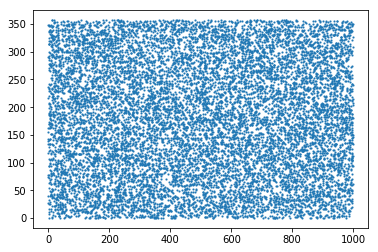

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline


print(X.index)

print(X.index//1000)
print(X.index%1000)

plt.plot(X.index%1000,X.index//1000,'s',markersize=1)
plt.show()

In [7]:
# Get one supernovae - the first in the list
X.iloc[0]

mjd_u                                                          []
fluxcal_u                                                      []
fluxcalerr_u                                                   []
mjd_g                                                          []
fluxcal_g                                                      []
fluxcalerr_g                                                   []
mjd_r           [59801.355, 59826.312, 59842.246, 59854.148, 5...
fluxcal_r       [-0.025486356, 0.5754772, 1.0124704, -1.351828...
fluxcalerr_r    [1.6725043, 0.8525785, 0.78943217, 1.1398131, ...
mjd_i           [59798.336, 59801.371, 59826.324, 59842.262, 5...
fluxcal_i       [2.3533344, -0.8588022, 2.043002, -1.1609608, ...
fluxcalerr_i    [1.9009135, 2.3289654, 1.5534494, 1.3592227, 2...
mjd_z           [59798.348, 59801.383, 59826.336, 59842.273, 5...
fluxcal_z       [1.6863078, 5.1396837, -0.098952234, -1.703039...
fluxcalerr_z    [2.478118, 3.0515583, 2.0781202, 2.085021, 2.7...
mjd_Y     

You can choose one specific SN through its ID. For example, if you wish to access the SN 1618,

In [8]:
X.loc[1618]

mjd_u                                                          []
fluxcal_u                                                      []
fluxcalerr_u                                                   []
mjd_g                                                          []
fluxcal_g                                                      []
fluxcalerr_g                                                   []
mjd_r           [59801.355, 59826.312, 59842.246, 59854.148, 5...
fluxcal_r       [-0.448459, -2.1569495, -1.1211287, -0.6498741...
fluxcalerr_r    [1.6725056, 0.8522378, 0.788678, 1.1398, 1.709...
mjd_i           [59798.336, 59801.371, 59826.324, 59842.262, 5...
fluxcal_i       [-0.6055304, -2.8982553, -1.1011478, 0.7371741...
fluxcalerr_i    [1.8999473, 2.3290005, 1.5524518, 1.3596191, 2...
mjd_z           [59798.348, 59801.383, 59826.336, 59842.273, 5...
fluxcal_z       [-1.4593571, 3.3925047, 3.0104508, -0.69094664...
fluxcalerr_z    [2.4775856, 3.0510728, 2.079283, 2.0850086, 2....
mjd_Y     

The y holds the IDs in crescent order

In [9]:
y[:10]

""
1
11
37
50
121
133
137
154
156
164


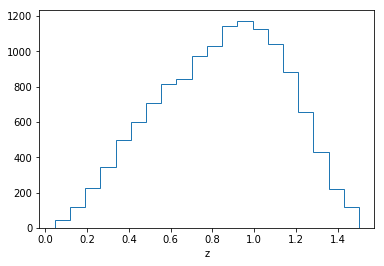

In [14]:
plt.hist(X['z'],bins=20,histtype='step')
plt.xlabel('z')
plt.show()

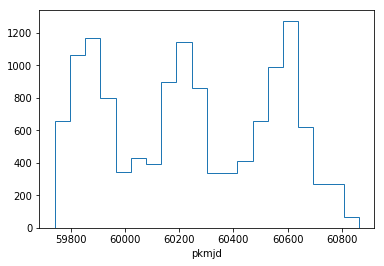

In [15]:
plt.hist(X['pkmjd'],bins=20,histtype='step')
plt.xlabel('pkmjd')
plt.show()

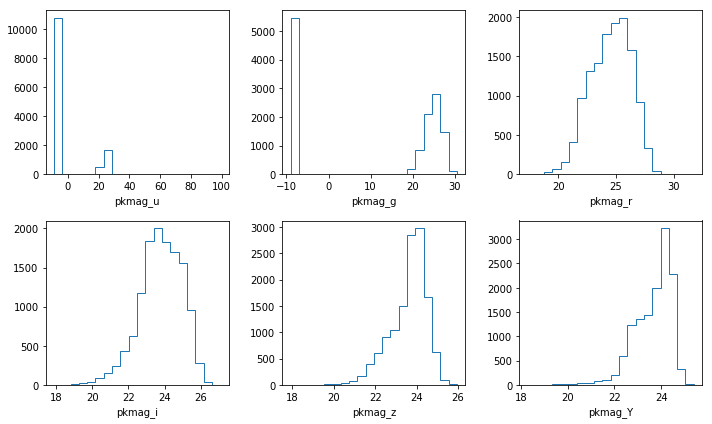

In [28]:
fig = plt.figure(figsize=(10,6))
for i,f in enumerate(['u','g','r','i','z','Y']):
    plt.subplot(2,3,i+1)
    plt.hist(X['pkmag_'+f],bins=20,histtype='step')
    plt.xlabel('pkmag_'+f)
plt.tight_layout()
plt.show()

## Plotting the Light curves

You can use the utility bellow to plot one (or a few) light curves

In [147]:
#Plot the data
# plt.style.use('seaborn')

LSST_FILTERS = 'ugrizY'

def plot_lightcurves(idx, X, color):    
    
    flux = []
    for f in LSST_FILTERS:
        if len(X.iloc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.iloc[idx]['fluxcal_' + f]))

    for id_f, f in enumerate(LSST_FILTERS):        
#         ax = axes[id_f // 3, id_f % 3]
        ax = axes[id_f]
        ax.plot(X.iloc[idx]['mjd_%s' % f]-X.iloc[idx]['pkmjd']+idx*20.,
                    X.iloc[idx]['fluxcal_%s' % f]/max(flux),
                    'o',markersize=4,color=color)
        ax.set_xlabel('MJD')
        ax.set_ylabel('Flux')
        ax.set_title('%s-band' % f)

The functionality bellow will plot light curves in sequence, order by ID

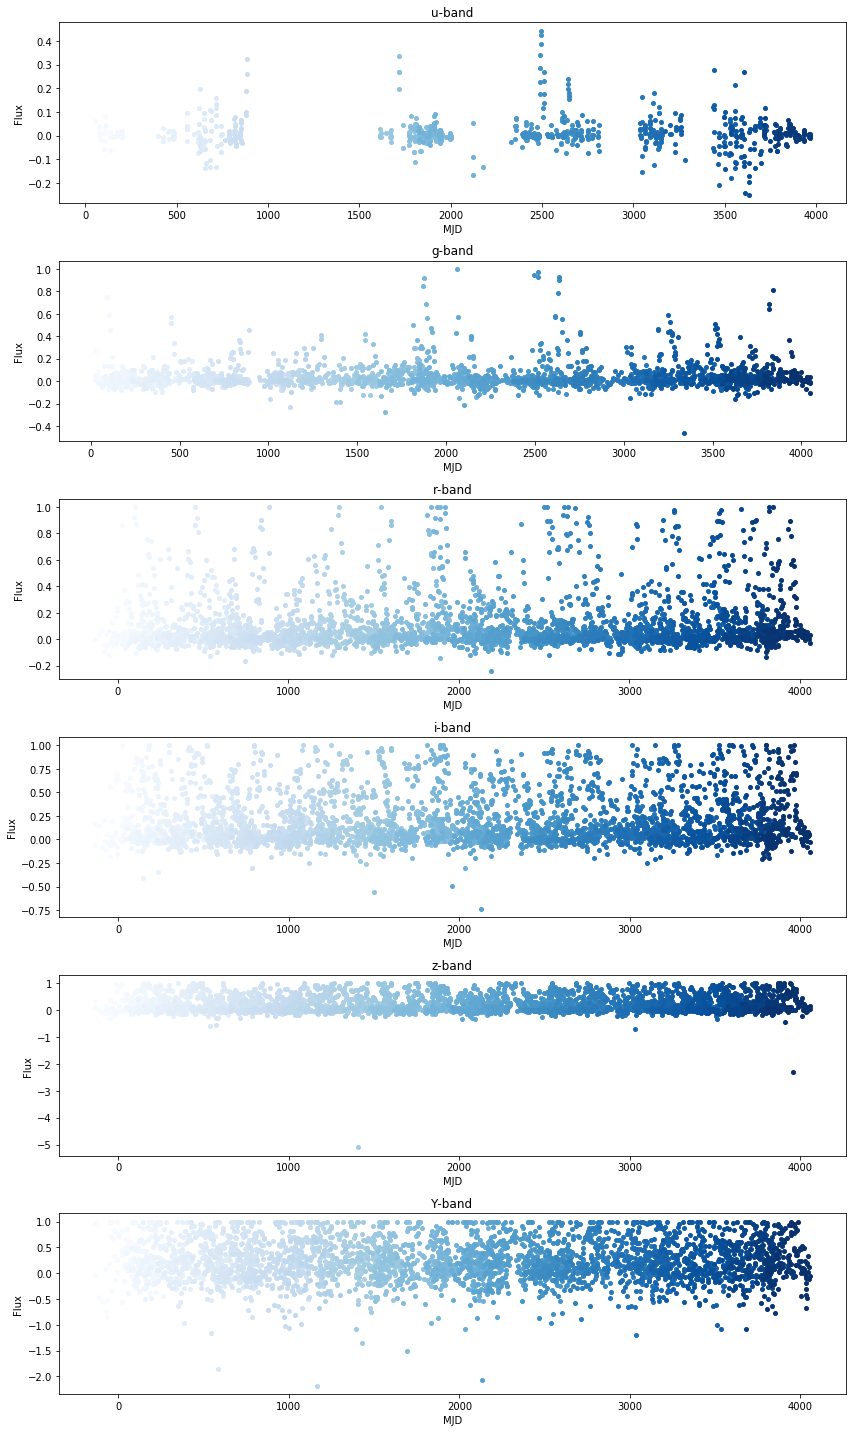

In [149]:
# set the number of light curves to plot
nplots = 200

colors = plt.cm.Blues(np.linspace(0,1,nplots))

fig, axes = plt.subplots(6, 1, figsize=(12, 20))
Xsort = X.sort_values(by=['pkmjd'])
for i in range(nplots):
    plot_lightcurves(i, X,color=colors[i])
plt.tight_layout()
plt.show()

If you wish to plot one specific light curve, e.g. again SN 1618,

In [102]:
def plot_lightcurves_id(idx, X):    
    
    flux = []
    for f in LSST_FILTERS:
        if len(X.loc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.loc[idx]['fluxcal_' + f]))
            
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))        
            
    for id_f, f in enumerate(LSST_FILTERS):
        
        
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.loc[idx]['mjd_%s' % f] - X.iloc[idx]['pkmjd'], 
                    X.loc[idx]['fluxcal_%s' % f]/max(flux), 
                    X.loc[idx]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='o')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

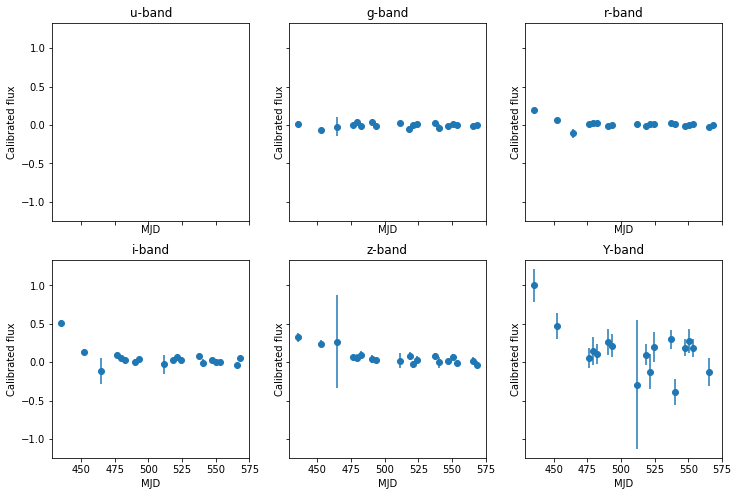

In [108]:
plot_lightcurves_id(121, X)

## Example of population tests

Bellow are just a few examples I could quickly think of. 
Feel free to add as much as you want

### Flux values

Check the minimum and maximum values for all filters

In [12]:
max_flux = {}
min_flux = {}

# for each filter
for f in LSST_FILTERS:
    max_flux[f] = []
    min_flux[f] = []
    
    # get the flux values
    for indx in range(len(X)):
        if len(X.iloc[indx]['fluxcal_' + f]) > 0:
            max_flux[f].append(max(X.iloc[indx]['fluxcal_' + f]))
            min_flux[f].append(min(X.iloc[indx]['fluxcal_' + f]))                   

After this information is gathered we can check the the distribution of its values

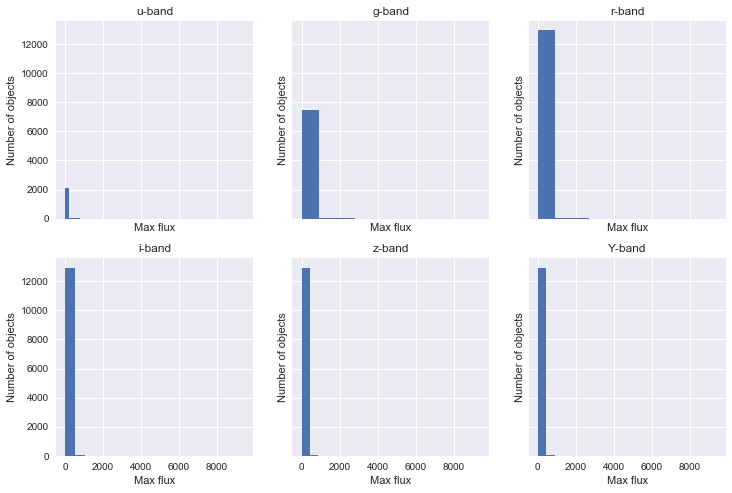

In [13]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))     
for id_f, f in enumerate(LSST_FILTERS):        
    ax = axes[id_f // 3, id_f % 3]
    ax.hist(max_flux[f])
    ax.set_xlabel('Max flux')
    ax.set_ylabel('Number of objects')
    ax.set_title('%s-band' % f)

In [14]:
for f in LSST_FILTERS:
    print(max(max_flux[f]))

1891.6506
9410.944
8931.692
5249.4375
4218.516
4439.849


Same thing for minimum values

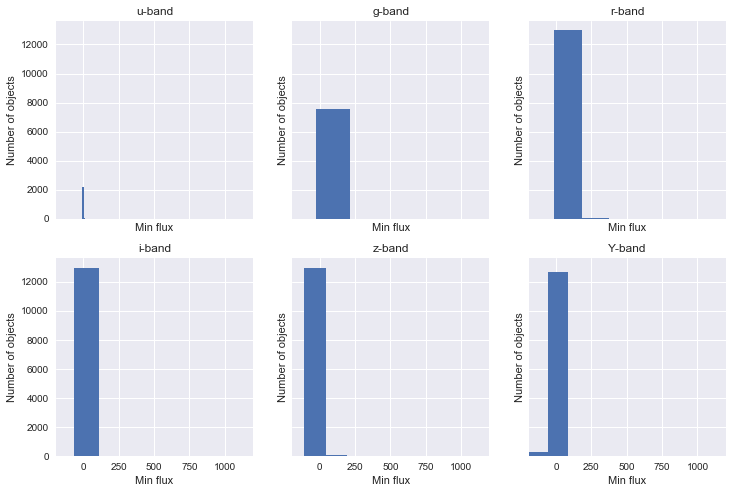

In [15]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))     
for id_f, f in enumerate(LSST_FILTERS):        
    ax = axes[id_f // 3, id_f % 3]
    ax.hist(min_flux[f])
    ax.set_xlim(min(min_flux[f]), max(min_flux[f]))
    ax.set_xlabel('Min flux')
    ax.set_ylabel('Number of objects')
    ax.set_title('%s-band' % f)

In [16]:
for f in LSST_FILTERS:
    print(min(min_flux[f]), max(min_flux[f]))

-11.868647 111.36419
-24.722345 2368.5588
-12.73745 1921.7611
-67.60747 1726.4125
-108.278564 1409.7944
-194.26408 1199.197


## Compare with ideal simulations

Using the same procedure we used before, generate the pkl files for the ideal simulations

```
>> python serialize_lsst_sn_sims.py ../../data/IDEAL_2018-02-11/IDEAL_MODEL01/ --timed
```

this will generate a `IDEAL_MODEL01_train.pkl` in your local directory.


You can read the data as before:

In [18]:
X1, y1 = read_data('IDEAL_MODEL01_train.pkl')

In [19]:
y1[:10]

""
1
3
6
8
95
103
106
107
149
206


And plot some ID

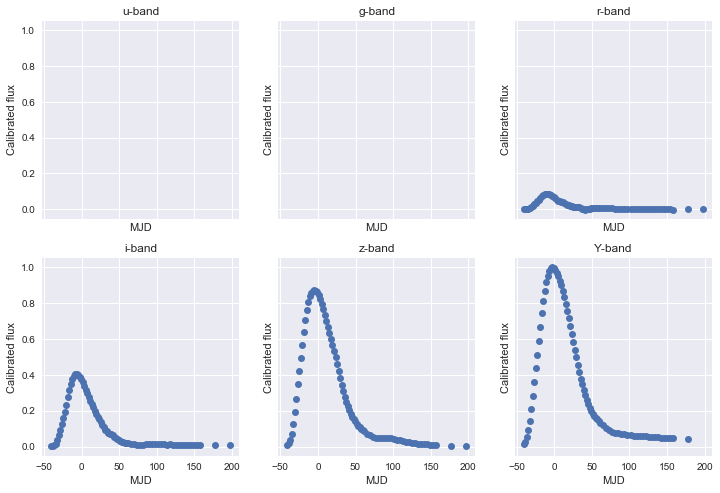

In [20]:
plot_lightcurves_id(1, X1)

Suppose we wish to compare our pet project SN 1618 from the non-ideal simuations. We can check its redshift:

In [21]:
z1618 = X.z[1618]
z1618

1.1337954998016357

now which ideal simulations are close to it in redshift

In [22]:
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - z1618) <= 0.001] 
neighbors[:10]

[741, 892, 1694, 1791, 1945, 2099, 2339, 3118, 3244, 3391]

Plot them all

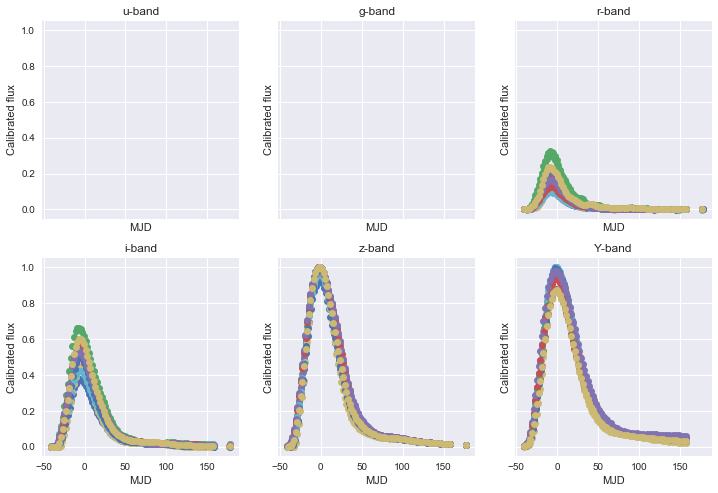

In [23]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
for i in neighbors:
    plot_lightcurves(i, X1)

Superimpose the non-ideal light curve.

In [24]:
snid = 1618

def plot_lightcurves_ideal_compare(snid, X, neighbors, X1):  
    
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8)) 
    
    for idx in neighbors:
        flux = []
        for f in LSST_FILTERS:
            if len(X1.iloc[idx]['fluxcal_' + f]) > 0:
                flux.append(max(X1.iloc[idx]['fluxcal_' + f]))
   
        for id_f, f in enumerate(LSST_FILTERS):
            ax = axes[id_f // 3, id_f % 3]
            ax.errorbar(X1.iloc[idx]['mjd_%s' % f] - X1.iloc[idx]['pkmjd'], 
                        X1.iloc[idx]['fluxcal_%s' % f]/max(flux), 
                        X1.iloc[idx]['fluxcalerr_%s' % f]/max(flux), 
                        fmt='o')
            ax.set_xlabel('MJD')
            ax.set_ylabel('Calibrated flux')
            ax.set_title('%s-band' % f)
    
    flux2 = []
    for f in LSST_FILTERS:
        if len(X.loc[snid]['fluxcal_' + f]) > 0:
            flux2.append(max(X.loc[snid]['fluxcal_' + f]))
    
    for id_f, f in enumerate(LSST_FILTERS):
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.loc[snid]['mjd_%s' % f] - X.loc[snid]['pkmjd'], 
                    X.loc[snid]['fluxcal_%s' % f]/max(flux), 
                    X.loc[snid]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='o', color='black')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

In the plot bellow, the black points corresponto the realistic light curve and the other colors to perfect simulations (high cadence and no noise)

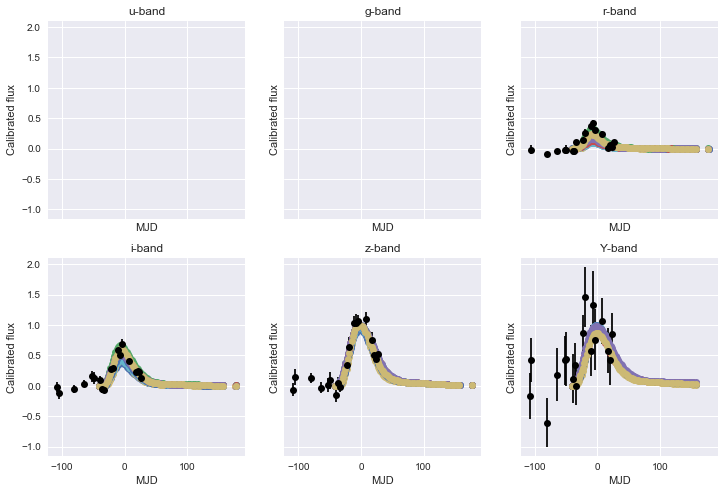

In [25]:
plot_lightcurves_ideal_compare(snid, X, neighbors, X1)